# Assignment 03: Regression, Learning Curves and Regularization

**Due Date:** Friday 10/04/2024


**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Aidan Corrales

CWID-5: 31600

## Introduction 

In this exercise we will be using what you have learned about linear regression, polynomial regression and
regularization, to explore an artificial dataset.

I have generated a secret dataset.  The dataset uses a polynomial combination of a single parameter.
The unknown function is no less than degree 2, but no more than a degree 20 polynomial.  And some random
noise has also been added into the function, so that fitting it is not a completely trivial or obvious
exercise.  Since the dataset is generated from a polynomial function, the output labels `y` are
real valued numbers.  And thus you will be performing a regression fitting task in this assignment.

Your task, should you choose to accept it, is to load and explore the data from this function.  Your ultimate
goal is to try your best to determine the degree of the polynomial used, and the values of the parameters
then used in the secret function.  Because of the noise added to the data you are given, you will not be able
to exactly recover the parameters used to generate the artificial data.  You will even find that determining the
exact degree of the generating polynomial function is not possible.  How you apply polynomial fitting and 
regularization techniques can give different and better or worse approximations of the true underlying function.

In the below cells, I give instructions for the tasks you should attempt.  You will need to load the data and
visualize it to begin with.  Then you will be asked to apply polynomial fitting and regularization in an attempt
to fit the data.  But ultimately, at the end, you should keep in mind that there is a true function of some
unknown polynomial degree with some coefficient settings used.  You will later be able to see what the
true function was and compare your model performance to the true function you are exploring in this
exercise.

In [102]:
# The following ipython magic will reload changed file/modules.
# So when editing function in source code modules, you should
# be able to just rerun the cell, not restart the whole kernel.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# By convention, we often just import the specific classes/functions
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
#Added by Aidan
from sklearn.metrics import mean_squared_error

In [104]:
# Import functions/moduls from this project.  We manually set the
# PYTHONPATH to append the location to search for this assignments
# functions to just ensure the imports are found
import sys
sys.path.append("../src")

# assignment function imports for doctests and github autograding
# these are required for assignment autograding
from assg_utils import run_unittests, run_doctests
from assg_tasks import task1_load_data, task2_underfit_model, learning_curve_errors, task4_overfit_model, task5_lasso_model, task6_ridge_model

In [105]:
# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot
plt.style.use('seaborn-v0_8-darkgrid')

## Task 1: Load Data, Explore and Visualize
------------

You have been given a set of 100 (artificial) data points in the file named `assg-03-data.csv` in our 
data subdirectory.  Start by loading this file into a pandas dataframe.  Explore the data a bit.
Use the `describe()` function to get a sense of the number of values (there should be `m=100` samples),
and their mean and variance.  There are 2 columns, where `x` is the feature, and `y` is the function
value.  Or in other words 'y' is the label we will use for the regression fitting task.  What is the range of
the `x` features?  What is the range of the `y` output label here?


In [106]:
# load data and describe and explore a bit here before doing first task
df = pd.read_csv('../data/assg-03-data.csv')
print(df.describe())
xRange = df['x'].max() - df['x'].min()
yRange = df['y'].max() - df['y'].min()
print(xRange)
print(yRange)

                x           y
count  100.000000  100.000000
mean     0.018845    1.603892
std      0.607629    0.670060
min     -0.960451    0.245220
25%     -0.507737    1.096119
50%     -0.082630    1.667083
75%      0.658614    2.207559
max      0.947452    2.712091
1.9079037461086044
2.466871489787676


For this assignment you will need to create a function that loads this data and creates two numpy arrays.
Write/complete the function in `src/assg_tasks.py` named `task1_load_data()`.  This function should
simply load the data from the file, as you did above.  It should extract the `x` features into
a numpy array.  This array needs to be a 2-d column array (so it should be shaped (100,1)).  Likewise
you should extract the regression labels into a numpy array, though the target regression labels should
be returned as a 1-d vector with 100 elements in it.  Your `x` and `y` arrays should be returned
from this function as a result of calling it.

Do not modify or remove the following cell.  When your function correctly loads and returns the
expected feature array `x` and target labels `y`, the following cell should run and pass
the tests for your work.

In [107]:
# do not remove or modify the code in this cell
x, y = task1_load_data()
run_unittests(['test_task1_load_data'])

test_loaded_types (test_assg_tasks.test_task1_load_data.test_loaded_types)
test_loaded_types ... 

ok
test_x_properties (test_assg_tasks.test_task1_load_data.test_x_properties)
test_x_properties ... ok
test_y_properties (test_assg_tasks.test_task1_load_data.test_y_properties)
test_y_properties ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.035s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Finally before moving on, create a scatter plot of the data that you are using in this assignment
in the following cell.  Make sure you are using a scatter plot, since this is raw data and
not a model.  You should label your axis on the plot.

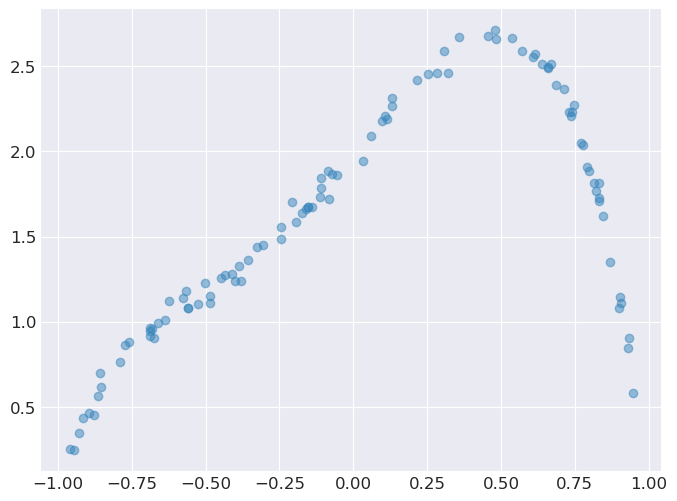

In [108]:
# visualize the data we loaded here
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='#3886bc', label='Data points', alpha=0.5)

## Task 2: Create an Underfit Model

The degree of the secret function is more than 2, but probably less than 20 in this assignment.  Lets create a model
that should underfit the data.  You will create a degree 2 (quadratic) model.  Underfit a degree 2 polynomial regression to the
data.  

You should complete the function in `src/asst_tasks.py` named `task2_underfit_model()` before
running the next cell to test your work.  This function takes the `x` input features and
`y` target labels as input, which should have been created successfully in the previous task.

Do the following to create a model
- Create a `scikit-learn` pipeline.
- The first step in the pipeline should be a `PolynomialFeatures` transformer that transforms the input features
  to a degree 2 polynomial.  You should not generate the bias terms from this transformer, as the linear regression
  model you will use does not expect a dummy input feature in the input feature data.
- Then for the second step have a standard `scikit-learn` `LinearRegression` model.  You should not specify any
  meta parameters for this underfit model, use all of the `scikit-learn` default settings for a linear regression.

Do not modify or remove the following code cell.  If you create your underfit model pipeline correctly, the
tests of your work in the next cell should all pass.

In [109]:
# do not remove or modify the code in this cell
underfit_model = task2_underfit_model(x, y)
run_unittests(['test_task2_underfit_model'])

test_coef (test_assg_tasks.test_task2_underfit_model.test_coef)
test_coef ... ok


test_intercept (test_assg_tasks.test_task2_underfit_model.test_intercept)
test_intercept ... ok
test_model_pipeline (test_assg_tasks.test_task2_underfit_model.test_model_pipeline)
test_model_pipeline ... ok
test_r2score (test_assg_tasks.test_task2_underfit_model.test_r2score)
test_r2score ... ok
test_rmse (test_assg_tasks.test_task2_underfit_model.test_rmse)
test_rmse ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.074s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In the next cell, use introspection of your fitted (pipeline) model to display the intercept and fitted
coeffecients of the model.  Also determine the final RMSE and $R^2$ score of the fit.  Display them
in the next cell(s) for future reference and discussion.

You should get a single intercept parameter.  Since you are underfitting a degree 2 model here, you should
expect 2 coefficients, one for the $x^1$ original feature term, and another for the generated
$x^2$ square term for your model.

Make note of the $R^2$ score, and especially the RMSE fit of your model here.  Do you expect the
undefit model to be a good model or a bad model of this data?

In [110]:
# display asked for model parameters and scores here
intercept = underfit_model.named_steps['linearregression'].intercept_
coefficients = underfit_model.named_steps['linearregression'].coef_

y_pred = underfit_model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))

r2_score = underfit_model.score(x, y)

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"R^2 score: {r2_score}")
print(f"RMSE: {rmse}")

Intercept: 2.086873037695686
Coefficients: [ 0.81875687 -1.36223923]
R^2 score: 0.7769591377499175
RMSE: 0.31486435395552376


## Task 3: Calculate and Display Learning Curves

Before moving on we need to evaluate how well the model is performing.  To do this you are first going to write a function
that will calculate train and test errors of your model, so that we can plot the learning curves of this and all of the other
models you build in this assignment.

Write the function named `learning_curve_errors()`. This function is in the `src/assg_tasks.py` file of this
assignment. 

The function takes a model (pipeline) and the `x` input features and `y` regression labels as input.  To calculate
the learning curve errors, you first need to split the data using an 80/20 train/test split.  Then you are going
to train the model with the training data.  You will first train the modle using only 1 of the training inputs.
The model will be evaluated on the data point it was trained with, and then on the test data.  Then you will train
a model with 2 data points and calculate the errors, and so on until you have trained a model on all of the
training data.  For each model from 1, 2 up to all of the training data, you will calculate the RMSE error on
from the model on the data you just trained it with, and also the RMSE error on the 20% test data you held back
at the start.

So to complete this function, perform the following steps in the `learning_curve_errors()` function:

1. Split the `x` `y` data you are given in the function into 80% training data and 20% test data.  Use
   the appropriate `sckit-learn` function to perform this split, don't do it by hand.
2. You will need to return the accumulated train and test errors, so create empty Python lists or numpy
   arrays to accumulate and return the errors as you calculate them.
3. You need a loop that trains/fits a model then calculates the RMSE error on the data trained with and
   on the held back test data.
   - Train with 1, 2, 3, ..., all of the train data in the loop
   - Evaluate the error on the training data (make sure you only evaluate on the data you trained with, not
     all of the training data.
   - Evaluate the error on the 20% held back test data.
   - Append both of these to the array/list you accumulate of the train and test errors
4. This function should return the calculated lists of training errors and test errors.

You should not remove or modify the following code cell(s), which will test that your implementation of
the `learning_curve_errors()` function is working as expected.

In [111]:
# do not remove or modify the code in this cell
run_unittests(['test_learning_curve_errors'])
#run_doctests(learning_curve_errors, globals())

test_test_errors (test_assg_tasks.test_learning_curve_errors.test_test_errors)
test_test_errors ... ok
test_train_errors (test_assg_tasks.test_learning_curve_errors.test_train_errors)
test_train_errors ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.529s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

Use this function to plot the learning curves for your underfit model on all of the
data you have.

1. You should call your `learning_curve_errors()` function on your underfit model, and the `x` inputs and `y` labels.
   You will need to keep the returned train and test errors.
2. Before calling the function to generate the learning curve errors, set the NumPy random seed to 42.  If you do this
   you will always get the same train/validation split of data when the function is called.  If you do this you
   should see that performance converges for train and validation RMSE after using around only 10 data points or so.
3. Plot your train and test errors on the same figure.  Label the axis appropriately, and use a legend in your figure
   to identify which curve is the training error and which is the testing error.  You should use lines for both
   of these curves on this figure.  Make sure you cn see where these converge on the figure, you may need to limit the
   y axis to be able to see and read this from your figure.   

In [112]:
# call your learning_curve_errors() function to the the test and train errors
np.random.seed(42)
train_errors, test_errors = learning_curve_errors(underfit_model, x, y)


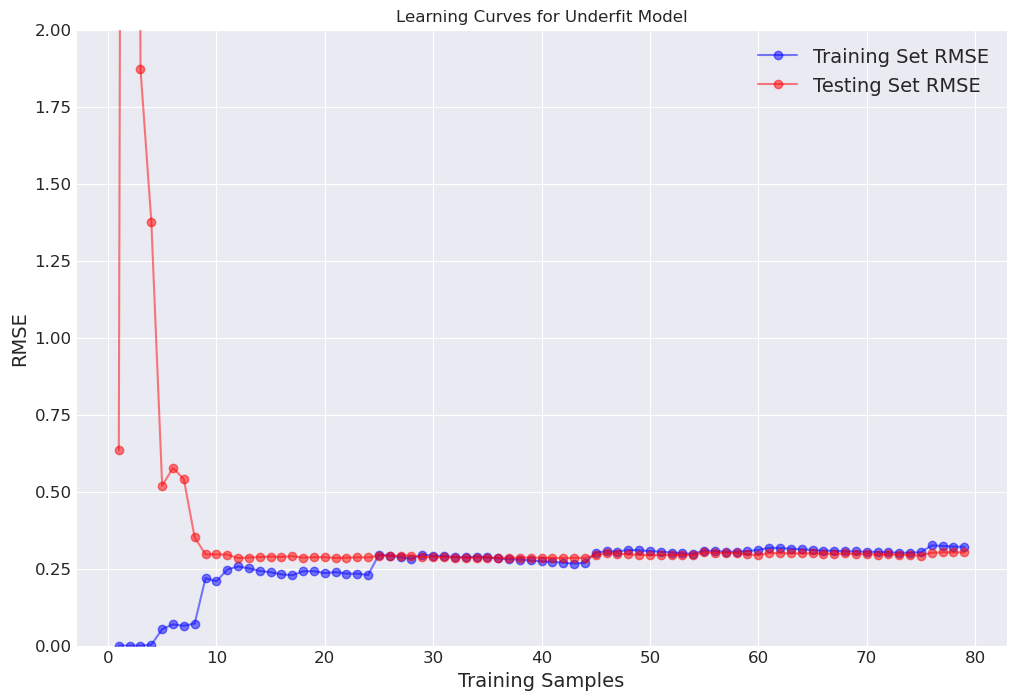

In [113]:
# plot the resulting learning curve
plt.plot(range(1, len(train_errors) + 1), train_errors, label="Training Set RMSE", color='blue', marker='o', alpha=0.5)
plt.plot(range(1, len(test_errors) + 1), test_errors, label="Testing Set RMSE", color='red', marker='o', alpha=0.5)
plt.xlabel('Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curves for Underfit Model')
plt.ylim(0, 2)
plt.legend()

You may want or need to limit the y axis to better view the learning curves.  You should see a
bit of a gap usually (because of random split in the learning curves function, results will
vary each time you run).  But usually with a training set size of 20 points or so you should find that
results converge.  Note the RMSE that you are getting on the training and validation data once they
converge on the underfit model.

Recall from our discussion in class, that the RMSE obtained on an underfit model does give you some information.
We would hope that if we can find a model with the right power, that the validation results will still converge
relatively quickly, but with better overall RMSE performance than the underfit model can obtain.

## Task 4: Create an Overfit Model

The next step when trying to determine what we can achieve with a type of ML model is to try and
overfit the data with a too powerful model.

Repeat the previous steps, but with a degree 100 polynomial.  This should be many times larger than the
actual degree of the polynomial used in the secret function for this assignment.

Do all of the previous steps again for a degree 100 model in the following cells.

1. Implement the function named `task4_overfit_model()` in the `src/assg_tasks.py` file.  In this function you need to:
   - Create a pipeline to generate degree 100 features that feeds into a default `LinearRegression` model.
   - Fit the model to all of the data given as input to the function.
   - Return the trained overfit model for testing.

Do not modify or remove the following code cell.  If your model performs as expected, you should
pass the tests performed on your model in the next cell.


In [114]:
# do not remove or modify the code in this cell
overfit_model = task4_overfit_model(x, y)
run_unittests(['test_task4_overfit_model']);

test_coef (test_assg_tasks.test_task4_overfit_model.test_coef)
test_coef ... ok
test_intercept (test_assg_tasks.test_task4_overfit_model.test_intercept)
test_intercept ... ok
test_model_pipeline (test_assg_tasks.test_task4_overfit_model.test_model_pipeline)
test_model_pipeline ... ok
test_r2score (test_assg_tasks.test_task4_overfit_model.test_r2score)
test_r2score ... ok
test_rmse (test_assg_tasks.test_task4_overfit_model.test_rmse)
test_rmse ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.080s

OK


Once your overfit model is working, do the following

1. Report the intercept and slope coefficients for the model.  There should be consideradbly more coefficients this
   time around for your overfit model.
2. Report $R^2$ and RMSE scores obtained by this overfit model.
3. Plot the learning curves of the overfit model.  You should reuse your task 2 function to generate the
   learning curve errors to be plotted.  Make sure you set the random seed to 42 again before generating
   the learning curve errors.  Also make sure you limit the y axis if needed to be able to see where
   if the model converges and what error level the train error settles at.

You may want to stop and compare the results of the underfit and overfit model.  What od you notice about
the $R^2$ score?  What about the RMSE error reported?  What do you notice about the coefficient values
that were fit for the two models?

In [115]:
# report the fitted model parameters
intercept = overfit_model.named_steps['linearregression'].intercept_
coefficients = overfit_model.named_steps['linearregression'].coef_

y_pred = overfit_model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))

r2_score = overfit_model.score(x, y)

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"R^2 score: {r2_score}")
print(f"RMSE: {rmse}")


Intercept: 1.9238693956195079
Coefficients: [ 1.44279308e+00  9.53866848e+00  6.90939611e+01 -4.33691656e+02
 -2.15010764e+03  1.20109050e+04  1.80990929e+04 -2.35615035e+05
  1.94140808e+05  3.25120021e+06 -5.68161105e+06 -3.10898992e+07
  6.01031076e+07  2.06168412e+08 -3.82876308e+08 -9.48509720e+08
  1.63148149e+09  2.98268600e+09 -4.72641232e+09 -6.09836386e+09
  8.86165366e+09  6.96091512e+09 -8.87026945e+09 -1.58761042e+09
  1.54803706e+08 -5.22575480e+09  8.19535912e+09  2.39468664e+09
 -1.37922413e+09  4.83622177e+09 -7.97324735e+09 -5.69312769e+08
 -1.58001493e+09 -4.59336571e+09  6.76571985e+09 -2.55363700e+09
  6.33127633e+09  2.05916783e+09 -1.16186493e+09  4.16155257e+09
 -7.20838214e+09  2.34387586e+09 -6.44964056e+09 -1.18638018e+09
 -3.47792009e+08 -3.48538244e+09  5.80981570e+09 -3.18801762e+09
  7.66929836e+09 -9.23844967e+08  4.47285725e+09  1.65962784e+09
 -1.33493127e+09  3.10696258e+09 -6.21094383e+09  2.85754872e+09
 -7.64240840e+09  1.28142306e+09 -5.20722421e+

In [116]:
# finally generate the learning curves for the overfit model.  Set the
# random seed to 42 before plotting learning curves again.  And
# limit y axis if needed to be able to see where curves converge
np.random.seed(42)
train_errors, test_errors = learning_curve_errors(overfit_model, x, y)

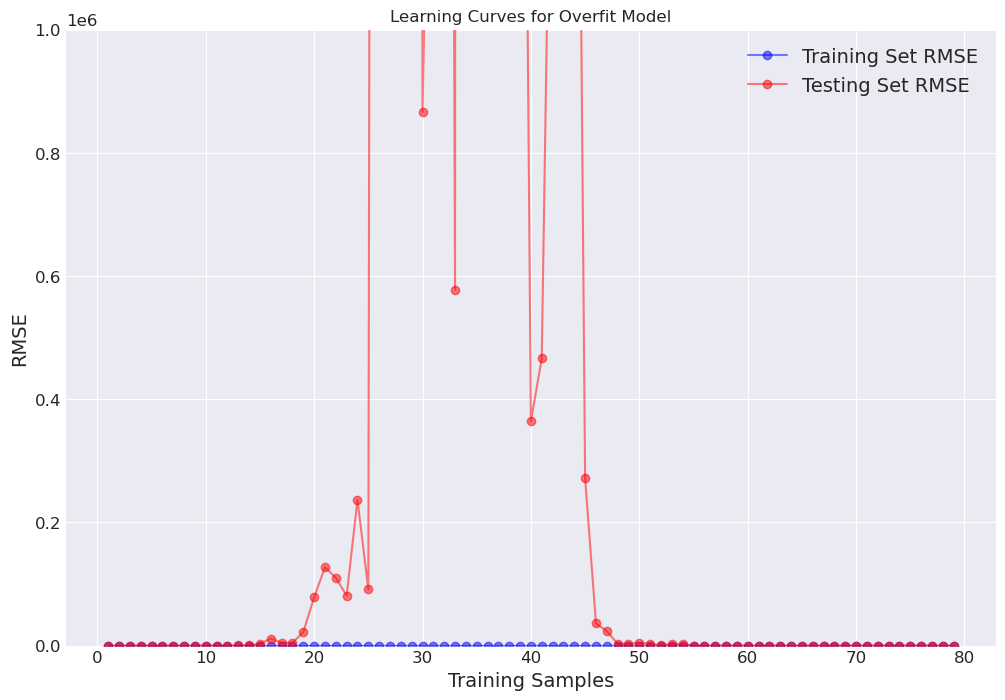

In [117]:
# plot the resulting learning curve
plt.plot(range(1, len(train_errors) + 1), train_errors, label="Training Set RMSE", color='blue', marker='o', alpha=0.5)
plt.plot(range(1, len(test_errors) + 1), test_errors, label="Testing Set RMSE", color='red', marker='o', alpha=0.5)
plt.xlabel('Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curves for Overfit Model')
plt.ylim(0, 1000000)
plt.legend()

## Task 5: Estimate True Function Degree using Lasso Regularization

The Lasso Regularization that we discussed in class (using absolute value for the regularization term,
also known as $\ell_1$ regularization), has the effect of driving unneeded parameters to 0.  So in our current
assignment, it can give us some insight into the true degree of the secret function polynomial used to
generate the data you were given.

In the following cell, use Lasso regularization on the degree 100 model again.  Try exploring values
of alpha used in your Lasso regularization model.  Your goal is to find a value of alpha
that will achieve an RMSE on your fitted model much better than the underfit RMSE and hopefully approaching the overfit
model error.  You probably won't be able to get quite the same RMSE, but you should be able to
find values of `alpha` that are much better than the underfit model achieves.

Do all of the previous steps again for a Lasso regularization model in the following cells.  As before, your actual code needs to
go into the `task5_lasso_model()` function in the `src/assg_tasks.py` file.

1. Create a pipeline to generate degree 100 features for a `Lasso` regression model.
2. Fit the Lasso regularized pipeline model to all of the data, exploring good values of `alpha` to use for the regularization.

Do not remove or modify the following code cell line.  It will test that you create a `Lasso` model
as expected, and that it gets a reasonable fit on the data.  Your model will be tested to see that
it meets reasonable expectations for this task by the unit tests.


In [132]:
# do not remove or modify the code in this cell
lasso_model = task5_lasso_model(x, y)
run_unittests(['test_task5_lasso_model']);

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.778e-02, tolerance: 4.445e-03
  model = cd_fast.enet_coordinate_descent(
test_coef (test_assg_tasks.test_task5_lasso_model.test_coef)
test_coef ... ok
/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.778e-02, tolerance: 4.445e-03
  model = cd_fast.enet_coordinate_descent(
test_model_pipeline (test_assg_tasks.test_task5_lasso_model.test_model_pipeline)
test_model_pipeline ... ok
/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objecti

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.778e-02, tolerance: 4.445e-03
  model = cd_fast.enet_coordinate_descent(
test_rmse (test_assg_tasks.test_task5_lasso_model.test_rmse)
test_rmse ... ok
/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.778e-02, tolerance: 4.445e-03
  model = cd_fast.enet_coordinate_descent(

----------------------------------------------------------------------
Ran 4 tests in 0.144s

OK


Then as before, do the following with the returned fitted `Lasso` model:

1. Report the intercept and slope coefficients for the model. Note which parameters have been driven to 0 by the
   Lasso regularization.
2. Report $R^2$ and RMSE scores obtained by this Lasso regularized model.
3. Plot the learning curves of the Lasso regularized model.  Reuse your `learning_curve_errors()` function.
   Make sure that you set the random seed to 42 before calculating the learning curve errors, and that
   you plot the learning curves the same as before so that it is apparent if the model is underfitting,
   overfitting or converging.

In [133]:
# report the model coefficients and scores for the lasso regularization model
intercept = lasso_model.named_steps['lasso'].intercept_
coefficients = lasso_model.named_steps['lasso'].coef_

y_pred = lasso_model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))

r2_score = lasso_model.score(x, y)

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"R^2 score: {r2_score}")
print(f"RMSE: {rmse}")

Intercept: 1.987917984166451
Coefficients: [ 1.89962715  0.         -1.60194563 -1.00156846 -0.34093868 -0.73408107
 -0.         -0.29813474 -0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0

In [120]:
# finally generate the learning curve errors for the lasso regularization
# model.  Set the random seed to 42 before plotting learning curves
# again.  And limit y axis if needed to be able to see where curves
# converge.  You will probably get ConvergenceWarnings here, though you
# may want to and probably should increase the `max_iter` for you model
# to reduce these warnings.
np.random.seed(42)
train_errors, test_errors = learning_curve_errors(lasso_model, x, y)

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.922e-04, tolerance: 1.167e-04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e-03, tolerance: 1.354e

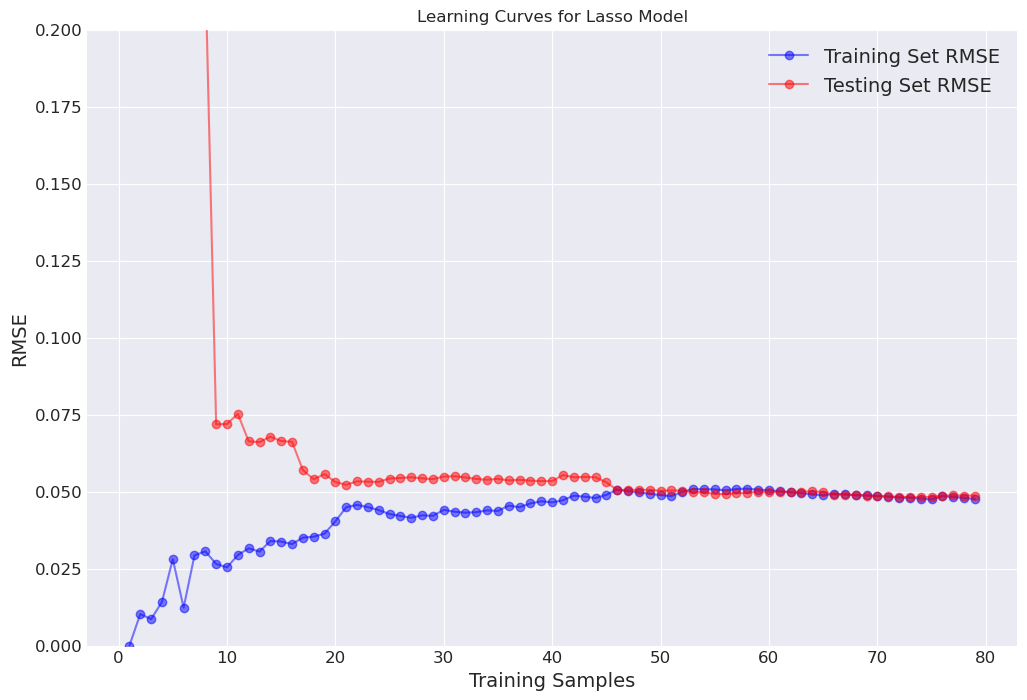

In [121]:
# plot the resulting learning curve
plt.plot(range(1, len(train_errors) + 1), train_errors, label="Training Set RMSE", color='blue', marker='o', alpha=0.5)
plt.plot(range(1, len(test_errors) + 1), test_errors, label="Testing Set RMSE", color='red', marker='o', alpha=0.5)
plt.xlabel('Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curves for Lasso Model')
plt.ylim(0, 0.2)
plt.legend()

You will know you are getting somewhere in the appropriate neighborhood for good
values of the `alpha` metaparameter when:

1. Your R^2 and RMSE scores are similar to the overfit model, and are certainly better than the underfit model.
2. The learning curves should "converge" again here, similar to the underfit model.  Probably sometime after using
   20 or 30 data points in the training set size.  But they should converge to an RMSE lower than that seen for
   the underfit model.

## Task 6: Use Ridge regularization

Try and at least match, if not improve upon, the best RMSE you can find from Lasso regularization using
Ridge regularization instead.  You should find that coefficients will not mostly be driven to 0's like
before for the Lasso regularization. But you may be more easily able to find an alpha that gets an improvement
in terms of RMSE over what you can obtain with the Lasso model.

Again perform all of the following for a Ridge regularization model, finding an appropriate value of the `alpha`
meta parameter.  The function where you implement your Ridge model is in the `task6_ridge_model()` function
in the `src/assg_tasks.py` file.

1. Create a pipeline to generate degree 100 features for a `Ridge` regression model.
2. Fit the Ridge regularized model pipeline to all of the data, exploring good values of `alpha` to use for the regularization.
3. Report the intercept and slope coefficients for the model. Note that most parameters are not 0 for this type of regularization.
5. Report $R^2$ and RMSE scores obtained by this Ridge regularized model.
6. Plot the learning curves of the Ridge regularized model.

As usual make sure you do not remove or change the following cell that tests your creating of the
Ridge model.

In [134]:
# do not remove or modify the code in this cell
ridge_model = task6_ridge_model(x, y)
run_unittests(['test_task6_ridge_model']);

test_coef (test_assg_tasks.test_task6_ridge_model.test_coef)
test_coef ... ok
test_model_pipeline (test_assg_tasks.test_task6_ridge_model.test_model_pipeline)
test_model_pipeline ... ok
test_r2score (test_assg_tasks.test_task6_ridge_model.test_r2score)
test_r2score ... ok
test_rmse (test_assg_tasks.test_task6_ridge_model.test_rmse)
test_rmse ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.135s

OK


In [135]:
# report model parameters and scores for the lasso regularization model
intercept = ridge_model.named_steps['ridge'].intercept_
coefficients = ridge_model.named_steps['ridge'].coef_

y_pred = ridge_model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))

r2_score = ridge_model.score(x, y)

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"R^2 score: {r2_score}")
print(f"RMSE: {rmse}")

Intercept: 1.984603469646935
Coefficients: [ 1.9919565   0.075351   -1.89437454 -1.2185355  -0.28168569 -0.38956612
  0.20074764 -0.23707216  0.09761211 -0.25577617 -0.05747544 -0.25469489
 -0.12008009 -0.19867847 -0.10445924 -0.10389812 -0.05105059  0.00328717
  0.01094757  0.10127813  0.06604901  0.17695881  0.10770528  0.22489762
  0.13417111  0.24517297  0.14605737  0.24118675  0.14506343  0.21794184
  0.13334256  0.18085789  0.11317193  0.13504539  0.08676712  0.08491979
  0.05617154  0.0340463   0.02319156 -0.01487112 -0.01063602 -0.05991856
 -0.04405258 -0.09986098 -0.07606865 -0.13401786 -0.10594314 -0.16214177
 -0.13315529 -0.18430848 -0.15737344 -0.20082282 -0.17842316 -0.21214107
 -0.19625683 -0.21880921 -0.21092592 -0.2214155  -0.22255643 -0.22055515
 -0.2313279  -0.21680527 -0.23745586 -0.21070785 -0.24117754 -0.20275918
 -0.24274039 -0.19340419 -0.2423933  -0.18303436 -0.24037983 -0.17198825
 -0.23693334 -0.16055379 -0.23227364 -0.14897182 -0.22660471 -0.13744015
 -0.2201

In [124]:
# finally generate the learning curves for the lasso regularization
# model.  Set the random seed to 42 before plotting learning curves
# again.  And limit y axis if needed to be able to see where curves
# converge
np.random.seed(42)
train_errors, test_errors = learning_curve_errors(ridge_model, x, y)

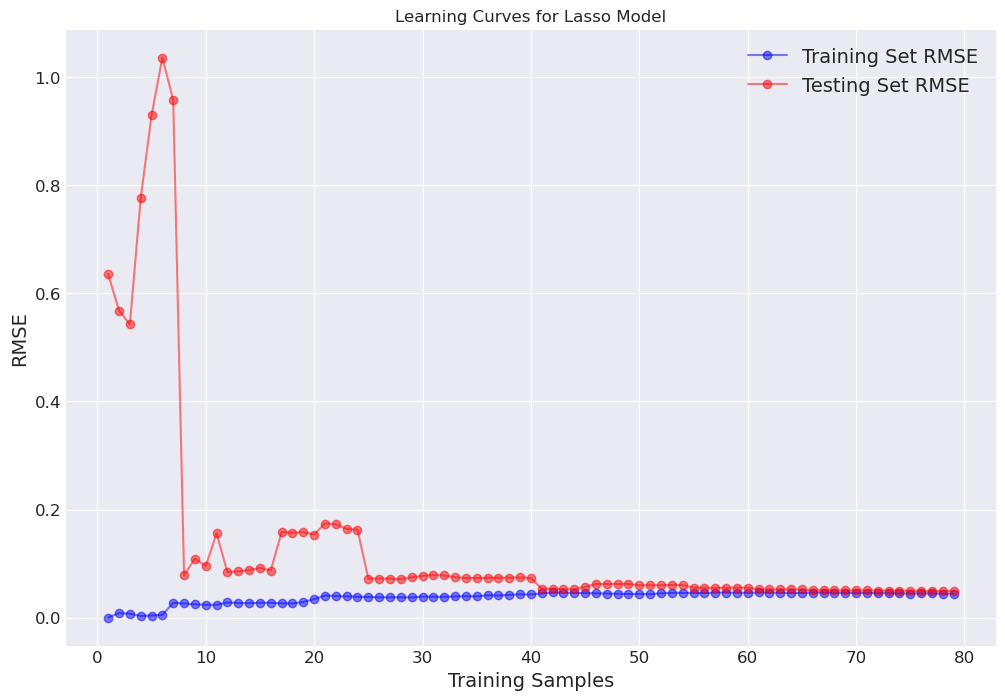

In [136]:
# plot the resulting learning curve
plt.plot(range(1, len(train_errors) + 1), train_errors, label="Training Set RMSE", color='blue', marker='o', alpha=0.5)
plt.plot(range(1, len(test_errors) + 1), test_errors, label="Testing Set RMSE", color='red', marker='o', alpha=0.5)
plt.xlabel('Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curves for Lasso Model')
#plt.ylim(0, 500)
plt.legend()

## Task 7: Summary and Discussion of Findings

Fill out the following table with the values you obtain in your work on the assignment.

| Model    | `alpha` | $R^2$  | RMSE   |
|----------|---------|--------|--------|
| underfit | none    | 0.7769 | 0.3148 | 
| overfit  | none    | 0.9972 | 0.0346 |
| Lasso    | 0.0000  | 0.9952 | 0.0459 |
| Lasso    | 0.0003  | 0.9947 | 0.0481 |
| Lasso    | 1.0000  | 0.0000 | 0.6667 |
| Ridge    | 0.0000  | 0.9974 | 0.0335 |
| Ridge    | 0.0001  | 0.9954 | 0.0449 |
| Ridge    | 1.0000  | 0.9689 | 0.1175 |

I would like to see at least 3 different values each for your Lasso and Ridge models.  

For the first Lasso regularization model, try and find an `alpha` that gets the lowest
RMSE that you can, and also drives as many of the coefficients to 0 as you can.  This can give
you an approximate estimate of the degree of the secret polynomial function you are trying to model.
Show a value that is larger than this `alpha` (more regularization), that drives even more parameters
to 0, but probably increases the RMSE error.  Also show a value with smaller `alpha`, that probably
is overfitting a bit, so you get the same RMSE, but maybe many or all of the coefficients are still non zero.

For the Ridge regression, for the secret function given in this assignment you will probably find that you
can get better RMSE than you can for LASSO.  Again try and find the value for the `alpha` amount of
regularization to Ridge that gives the minimum RMSE you can get, but doesn't seem to be overfitting.  Report
on a value of `alpha` bigger than this (more regularization) that seems to start to underfit so that the RMSE
goes up.  And also on a value smaller than the best you can find, so that you may be overfitting.

Once you have filled out the above table, please discuss your observations about the underfit, overfit,
Lasso and Ridge models that you have obsreved.  Your discussion must be in this markdown cell, in the
section marked `Discussion` below.  You should make observations on what the coefficients look like for the 
various models you fit.  You should give an estimate from your Lasso regression on what the degree of the
polynomial seems to be from your testing of alpha to find a model with the lowest RMSE that drives as many
coefficients to 0 as possible.  


### Discussion

Observations: The overfit model runs well, but hits data it is not used to in the mddle of the graph. The other 3 models have matching learning patterns, but on very different scales.

Overfitting actually works pretty well on the given dataset.

The more you drive the alphas to 0 in the Lasso and Ridge models the better the RSME and R^2 scores are. In the Lasso model, there is a sweet spot around alpha = .0003 where the coefficients are minimized in non-zeros, but the RSME and R^2 still give great values.

There are 6 coeficients when optimized, so perhaps that implies a 6th degree polynomial?

## Task 8: More Systematic Grid Meta-Parameter Search

While it is possible (and useful) to get a feel for what meta-parameter values you need to obtain
good results from regularization and different models, at times we need to be more systematic.

You have seen some examples of using the Scikit-learn grid search to more systematically
explore model meta parameters.  The following is a tutorial specifically for beginners
on using [scikit-learn GridSearchCV for Beginners](https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee)
that you might find helpeful to look at as well when doing this section.

In the following, perform a more systematic grid search of the alpha parameter for a Lasso
regression using a degree 100 polynomial as input.  Report the RMSE performance of
the best model you find.  Make sure you search a fairly good range of `alpha` parameters.
Also report the intercept and coefficients of the model.

Did the best model have a similar `alpha` value that you got trying to tune it by hand?  Do the
parameters that were driven to 0 look similar or different from the value of `alpha` you found
previously?  For extra consideration, create a plot to visualize the RMSE performance for the range of
`alpha` values that you explored in the grid search.

In [194]:
# create grid search of Lasso/l1 over alpha parameter space
pipe = make_pipeline(
    PolynomialFeatures(degree=100, include_bias=False),
    Lasso(max_iter=10000)
)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
param_grid = {'lasso__alpha': np.logspace(-5, 3, 10)}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

In [195]:
# fit the model to perform the grid search
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)

In [196]:
# display the best parameter you found
best_alpha = grid_search.best_params_['lasso__alpha']
print(f"Best Alpha found: {best_alpha}")

Best Alpha found: 0.0005994842503189409


In [198]:
# report intercept and slope coefficients for the lasso regularization model
intercept = grid_search.best_estimator_.named_steps['lasso'].intercept_
coefficients = grid_search.best_estimator_.named_steps['lasso'].coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: 1.9837878324889
Coefficients: [ 1.92588318 -0.         -1.72136471 -0.81468143 -0.22719532 -1.1951752
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.  

In [210]:
# report R^2 and RMSE performance of the lasso regularization model on all of the data here
y_pred = grid_search.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2_score = grid_search.score(x, y)

print(f"R^2 score: {(r2_score)}")
print(f"RMSE: {rmse}")

R^2 score: -0.002250896690999321
RMSE: 0.04744361591404392


Text(0, 0.5, 'R² Score')

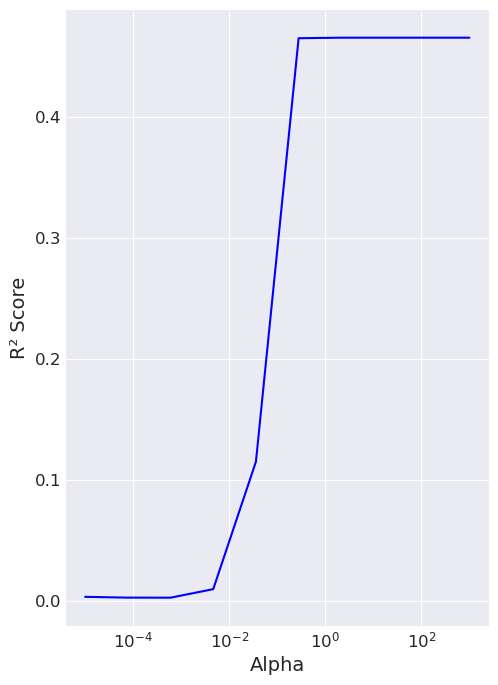

In [205]:
# visualize performance as a function of the alpha regularization parameter
alpha_values = grid_search.cv_results_['param_lasso__alpha'].data
mean_test_scores = grid_search.cv_results_['mean_test_score']
rmse_values = np.sqrt(-mean_test_scores)
plt.subplot(1, 2, 1)
plt.plot(alpha_values, -mean_test_scores, color='blue')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')

As a final activity for this assignment, below you have been given an example of a setup for a
`GridSearchCV` that will instead search all polynomial degrees from 2 to 100.  Modify the following 
code if necessary to run in your assignment (may need to change name of input `x` or output `y` or
other minor tweaks?)  Observe the polynomial degree obtained by this grid search on the data.  Does
that surprise your, or look resonable to some of the estimates you have made about the secret
function?

In [207]:
# a helper function.  This returns a fit/transformer pipeline, as GridSearchCV expects
# but we can call it to generate pipelines with different degree polynomials
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression(**kwargs))

# we set up grid search on single degree meta-parameter of the PolynomialFeatures part of the pipeline
# the result is that degrees from 1 to 100 are tried for PolynomialFeatures here
degrees = np.arange(2, 100)
parameters = {'polynomialfeatures__degree': degrees}

# the grid search over the polynomial degrees on standard Linear Regression
poly_gridcv = GridSearchCV(PolynomialRegression(), parameters, scoring='neg_mean_squared_error', cv = 5)

In [208]:
# fit the model to perform the grid search
poly_gridcv.fit(x, y)

# display the best parameter we found
print('Grid search best alpha parameter:', poly_gridcv.best_params_)
print('Grid search best MSE: ', poly_gridcv.best_score_)
print('Grid search best RMSE: ', np.sqrt(-poly_gridcv.best_score_))

Grid search best alpha parameter: {'polynomialfeatures__degree': 6}
Grid search best MSE:  -0.0026089811977560106
Grid search best RMSE:  0.051078187103263666


In [209]:
# report intercept and slope coefficients for the lasso regularization model
print('Intercept   : ', poly_gridcv.best_estimator_['linearregression'].intercept_)
print('Coefficients: ', poly_gridcv.best_estimator_['linearregression'].coef_)

Intercept   :  1.9833167896691242
Coefficients:  [ 2.00177466  0.0882761  -1.9827473  -1.03579234 -0.0283408  -1.06739182]
